#**Assignment 1 - Text Mining**
**For Text Mining assignment**
 
 ONE:

1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

**Data:** Elon_musk.csv


## **Importing Necessary Libraries**

In [228]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import  CountVectorizer

import re
import string
import nltk
import spacy
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Importing Data**

In [229]:
data = pd.read_csv('Elon_musk.csv',encoding='Latin-1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [230]:
data.drop(labels = 'Unnamed: 0' , axis = 1,inplace = True)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## **Text Preprocessing**

In [231]:
data=[Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [232]:
# Joining the list into one string/text
data_text=' '.join(data)
data_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [233]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(data_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [234]:
tweets_tokens_text=' '.join(tweets_tokens)
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation)) # Remove Punctuations 
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [235]:
ps = PorterStemmer()
lm = WordNetLemmatizer()
review  = re.sub(r'http\S+', '', no_punc_text)
review  = review.lower()
review  = review.split()
#review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review  = [lm.lemmatize(word) for word in review if not word in stopwords.words('english')]
review  = ' '.join(review)
review  = review.translate(str.maketrans('','',string.punctuation))# Remove Punctuations 
review  = re.sub(r'http\S+', '', review)# remove https or url within text
  


In [236]:
review

'\x92 alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail haha thanks indeed tweet definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse \x92 getting real bought dogecoin lil x toddler hodler definitely issue sentencing seems bit high thanks fixing please unlock account u0001f923 u0001f923 true power haha crypto wallet \x92 give private key avoided cost app suck rt nasa selected falcon heavy launch first two element lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pas deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g \x92 meant price country difference tax shipping intended earth may idea apply mar u0001f923 u0001f9

In [237]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(review)
print(text_tokens)

['\x92', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'haha', 'thanks', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'clubhouse', '\x92', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issue', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'true', 'power', 'haha', 'crypto', 'wallet', '\x92', 'give', 'private', 'key', 'avoided', 'cost', 'app', 'suck', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ip

In [238]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'thanks', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'clubhouse', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issue', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'true', 'power', 'crypto', 'wallet', 'give', 'private', 'key', 'avoided', 'cost', 'app', 'suck', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', '

In [239]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(no_stop_tokens))
print(doc)

alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail thanks indeed tweet definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin lil x toddler hodler definitely issue sentencing seems bit high thanks fixing please unlock account u0001f923 u0001f923 true power crypto wallet give private key avoided cost app suck nasa selected falcon heavy launch first two element lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pas deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g meant price country difference tax shipping intended earth may idea apply mar u0001f923 u0001f923 xprize team manage 100m carbon 

In [240]:
I_words=[token.lemma_ for token in doc]
print(I_words)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertain', 'outcome', 'likely', 'send', 'agree', 'clubhouse', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'true', 'power', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'app', 'suck', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', '

In [241]:
clean_tweets=' '.join(I_words)
clean_tweets

'alien ray trace cyberpunk hdr nextlevel try great interview doge underestimate congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail thank indeed tweet definitely represent realworld time allocation entertain outcome likely send agree clubhouse get real buy dogecoin lil x toddler hodler definitely issue sentencing seem bit high thank fix please unlock account u0001f923 u0001f923 true power crypto wallet give private key avoid cost app suck nasa select falcon heavy launch first two element lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pas deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g mean price country difference tax shipping intend earth may idea apply mar u0001f923 u0001f923 xprize team manage 100 m carbon capture prize everyone tesla re

## **Feature Extraction**

####**1. Count Vectorizer**

In [242]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(I_words)

In [243]:
tweetscv.shape

(10571, 3322)

In [244]:
print(cv.vocabulary_)

{'alien': 192, 'ray': 2292, 'trace': 2938, 'cyberpunk': 748, 'hdr': 1329, 'nextlevel': 1915, 'try': 2968, 'great': 1279, 'interview': 1517, 'doge': 869, 'underestimate': 3102, 'congratulation': 655, 'tesla': 2859, 'china': 565, 'amazing': 213, 'execution': 1034, 'last': 1598, 'year': 3304, 'next': 1914, 'even': 1009, 'happy': 1312, 'new': 1912, 'ox': 2032, 'frodo': 1183, 'underdoge': 3101, 'thought': 2884, 'would': 3292, 'fail': 1068, 'thank': 2868, 'indeed': 1458, 'tweet': 2983, 'definitely': 786, 'represent': 2358, 'realworld': 2307, 'time': 2900, 'allocation': 195, 'entertain': 979, 'outcome': 2012, 'likely': 1651, 'send': 2496, 'agree': 176, 'clubhouse': 594, 'get': 1240, 'real': 2302, 'buy': 487, 'dogecoin': 871, 'lil': 1652, 'toddler': 2910, 'hodler': 1372, 'issue': 1535, 'sentencing': 2501, 'seem': 2488, 'bit': 406, 'high': 1361, 'fix': 1129, 'please': 2126, 'unlock': 3126, 'account': 135, 'u0001f923': 3052, 'true': 2963, 'power': 2161, 'crypto': 730, 'wallet': 3206, 'give': 125

In [245]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [246]:
import warnings
warnings.filterwarnings('ignore')

####**2. TF-IDF Vectorizer**

In [247]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(I_words)

In [248]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(I_words)

In [249]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '2020', '30', '300', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'ago', 'agree', 'ai', 'aim', 'air', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'another', 'appear', 'apply', 'appreciate', 'approval', 'arm', 'around', 'article', 'astronaut', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'become', 'berlin', 'beta', 'better', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'build', 'burn', 'buy', 'cake', 'call', 'camera', 'car', 'cargo', 'carry', 'case', 'cast', 'catch', 'cell', 'certainly', 'ch4', 'challenge', 'chamber', 'chance', 'change', 'china', 'civilization', 'close', 'co', 'code', 'cold', 'color', 'come', 'communication', 'company', 'complete', 'complex', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'day', 'deep', 'definitely', 'delivery', 'design

##**Generate Word Cloud**

In [250]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

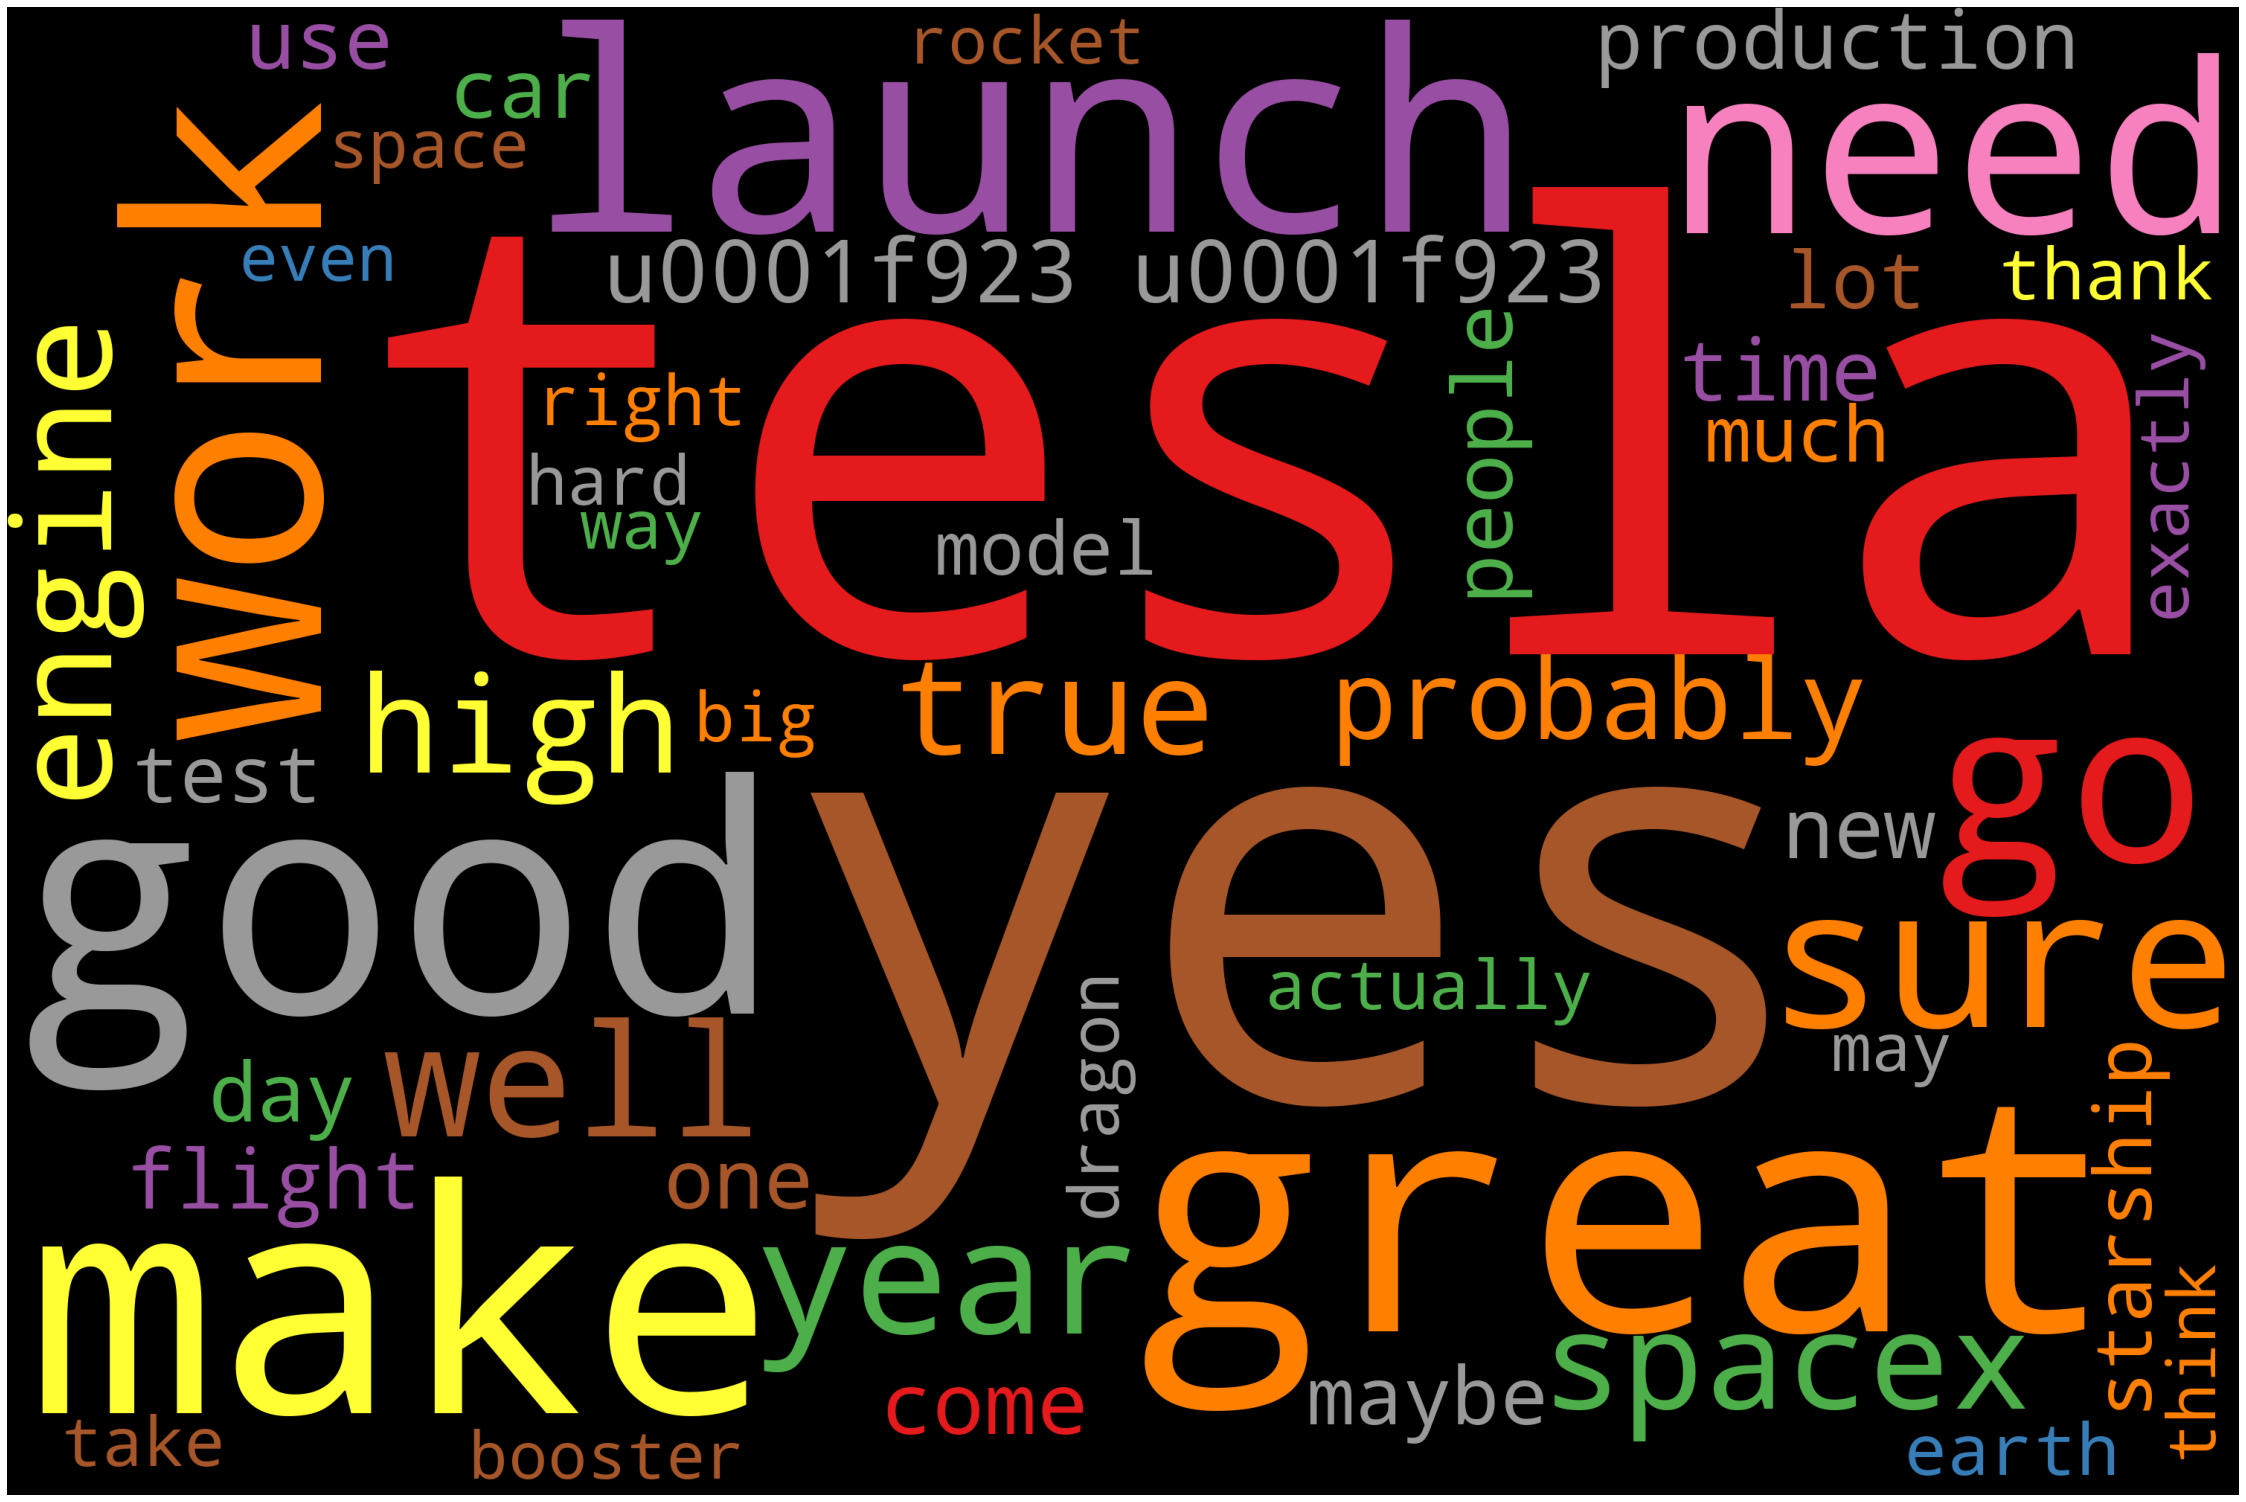

In [251]:
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)


##**Emotion Mining - Sentiment Analysis**

In [252]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(data))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [253]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [254]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [255]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [256]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [257]:
# manual testing
calculate_sentiment(text='great')

3

In [258]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [259]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [260]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
920,"It may never pay out, as the stock cant b ht...",-4,31
680,"Occasional flights from land are ok, but frequ...",-4,39
611,"Then static fire, checkouts, static fire, fly ...",-4,12
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,16,72


In [261]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.497835
std        2.763913
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [262]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [263]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",2,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",7,15
917,This is both great &amp; terrifying.,3,6


In [264]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922
